ex_1: solve 1D heat diffusion equation

sovle equation: $\frac{\partial u}{\partial t}=\frac{\partial^2 u}{\partial x^2}$ using finite difference method

given computing domain: $x\in[0,1]$, and initial value: $u|_{x=0.5,t=0}=100$

Step 1: import necessary libs

In [22]:
using Plots

Step 2: define variables

In [23]:
dx = 0.5; 

In [24]:
dt = 0.05;

In [25]:
x=Float64[0;1:100]/100.0;

In [26]:
u=zeros(Float64,101); u[51]=0.1;

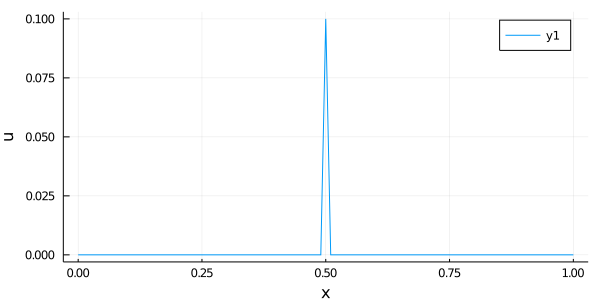

In [27]:
plot(x,u,size=(600,300),xlabel="x",ylabel="u")

In [28]:
u_all=zeros(Float64,99,100);
u_all[:,1]=u[2:100];

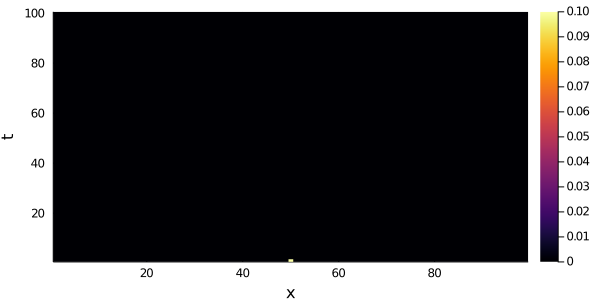

In [29]:
heatmap(u_all',size=(600,300),xlabel="x",ylabel="t")

Step 3: calculate derivatives

scheme of $\frac{\partial u}{\partial x}=\frac{u_{i+1}-u_{i}}{dx}$

In [30]:
dudx=zeros(Float64,100);
for i=1:100
    dudx[i]=(u[i+1]-u[i])/dx
#     println(dudx[i]," ",u[i])
end

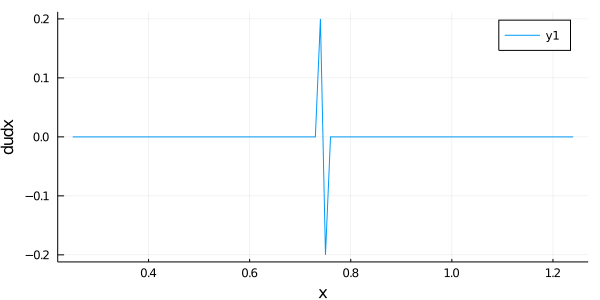

In [31]:
plot(x[1:100].+dx/2,dudx,size=(600,300),xlabel="x",ylabel="dudx")

scheme of $\frac{\partial^2 u}{\partial x^2}=\frac{{\partial u/dx}_{i+1}-{\partial u/dx}_{i}}{dx}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{dx^2}$

In [32]:
d2udx2=zeros(Float64,99);
for i=1:99
    d2udx2[i]=(dudx[i+1]-dudx[i])/dx
#     println(d2udx2[i],"  ",dudx[i])
end

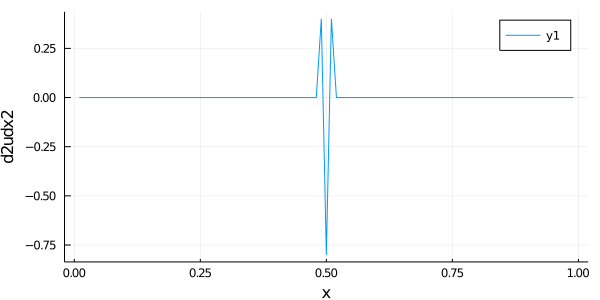

In [33]:
plot(x[2:100],d2udx2,size=(600,300),xlabel="x",ylabel="d2udx2")

Step 4: time marching

scheme of $\frac{\partial u}{\partial t}=\frac{u^{n+1}-u^{n}}{dt}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{dx^2}$

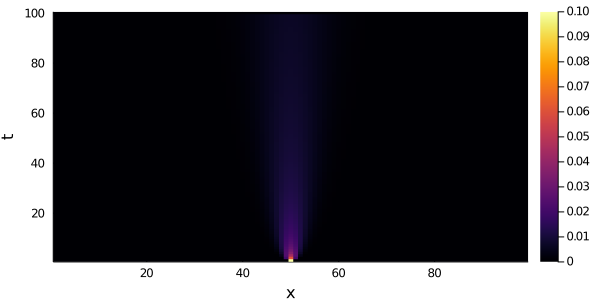

In [34]:
u_new=u;
dudx_new=dudx;
d2udx2_new=d2udx2;

for t=2:99
    for i=1:99
        u_all[i,t]=d2udx2_new[i]*dt+u_all[i,t-1]
    end
    u_new[2:100]=u_all[:,t];
    for i=1:100
        dudx_new[i]=(u_new[i+1]-u_new[i])/dx
#     println(dudx[i]," ",u[i])
    end
    for i=1:99
    d2udx2_new[i]=(dudx_new[i+1]-dudx_new[i])/dx
#     println(d2udx2[i],"  ",dudx[i])
    end
end
heatmap(u_all',size=(600,300),xlabel="x",ylabel="t")

┌ Info: Saved animation to 
│   fn = /home/zhengl/Codes/texJuliaCopyMatlab/codes_julia/anim_fps15.gif
└ @ Plots /home/zhengl/.julia/packages/Plots/SjqWU/src/animation.jl:104


Plots.AnimatedGif("/home/zhengl/Codes/texJuliaCopyMatlab/codes_julia/anim_fps15.gif")
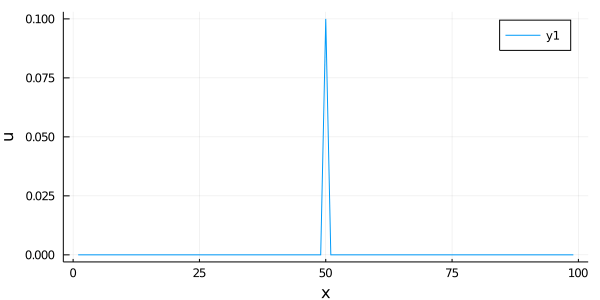

In [35]:
anim = @animate for i ∈ 1:99
    plot(u_all[:,i],size=(600,300),xlabel="x",ylabel="u");
end
gif(anim, "anim_fps15.gif", fps = 15)